In [14]:
from bs4 import BeautifulSoup as bs 
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from urllib.request import urlopen
import os
import re 
import nltk

In [15]:
#source mention
source = urlopen('https://en.wikipedia.org/wiki/Mumbai').read()
soup = bs(source,'lxml')

In [16]:
#Extracting text from site
text = ''
for paragraph in soup.find_all('p'):
    text += paragraph.text
    
text

'\nMumbai (English: /mʊmˈbaɪ/, Marathi:\xa0[ˈmumbəi]; formerly known as Bombay /bɒmˈbeɪ/, the official name until 1995) is the capital city of the Indian state of Maharashtra. According to the United Nations, as of 2018, Mumbai is the most populous city in the country and the seventh-most populous city in the world with a population of roughly 20\xa0million.[13] As per Indian government population census of 2011, Mumbai is the most populous city in India with an estimated city proper population of 12.5\xa0million living under Municipal Corporation of Greater Mumbai.[14] Mumbai is the centre of the Mumbai Metropolitan Region, the sixth most populous metropolitan area in the world with a population of over 23\xa0million.[15] Mumbai lies on the Konkan coast on the west coast of India and has a deep natural harbour. In 2008, Mumbai was named an alpha world city.[16][17] It has the highest number of millionaires and billionaires among all cities in India.[18][19]  Mumbai is home to three UN

In [17]:
#Text cleaning
text = re.sub(r'\[.*?\]+', '', text)
text = text.replace('\n', '')
text

'Mumbai (English: /mʊmˈbaɪ/, Marathi:\xa0; formerly known as Bombay /bɒmˈbeɪ/, the official name until 1995) is the capital city of the Indian state of Maharashtra. According to the United Nations, as of 2018, Mumbai is the most populous city in the country and the seventh-most populous city in the world with a population of roughly 20\xa0million. As per Indian government population census of 2011, Mumbai is the most populous city in India with an estimated city proper population of 12.5\xa0million living under Municipal Corporation of Greater Mumbai. Mumbai is the centre of the Mumbai Metropolitan Region, the sixth most populous metropolitan area in the world with a population of over 23\xa0million. Mumbai lies on the Konkan coast on the west coast of India and has a deep natural harbour. In 2008, Mumbai was named an alpha world city. It has the highest number of millionaires and billionaires among all cities in India.  Mumbai is home to three UNESCO World Heritage Sites: the Elephant

In [18]:
#splitting words into list
wordlist=text.split()

In [21]:
#Converting lists into csv file
df = pd.DataFrame(wordlist)
df.to_csv('mumbai.csv', index=False, header=False)
len(wordlist)

9974

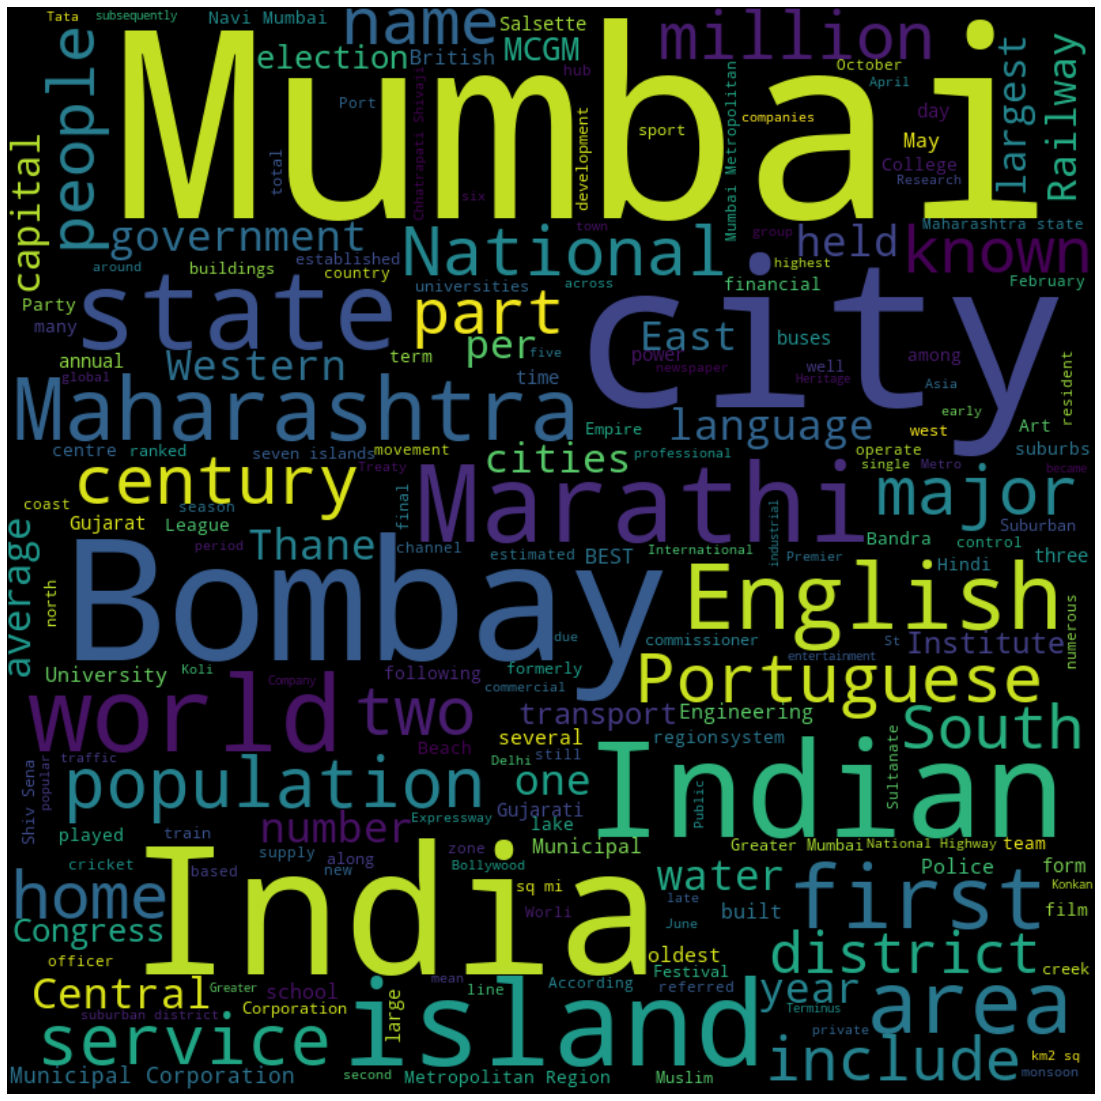

In [25]:
#plotting word cloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black',
                stopwords = STOPWORDS ,
                min_font_size = 8).generate(text)
  
                      
plt.figure(figsize = (30, 20), facecolor = None) 
plt.imshow(wordcloud,interpolation = 'bilinear') 
plt.axis("off")  
  
plt.show()

In [27]:
# Save the image in the img folder:
wordcloud.to_file("wordcloud2.png")